# How does America actually like their coffee?

## Context
This notebook explores the **Great American Coffee Taste Test** survey. We'll check whether **stated roast preferences** align with **blind tasting choices**, plus a quick EDA. We will also be exploring the connection between coffee preference and where people drink their coffee? Do home brewed consumers like a simpler homey roast like their environment or share the sugary sweet preferences of cafe goers? 

## Questions
**Do tasters' stated roast preferences align with what they actually chose in the blind test?**
**What are the coffee trends based on environment?**

## Data

**The data set from the Great American Coffee Tast Test survey is a collection of the coffee preferences of surveyers. The questions explore topics such as roast, environment, political party, and education.**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("coffeedata.csv")
df.head()

,Submission ID,What is your age?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these),How do you brew coffee at home?,...,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Gender,Gender (please specify),Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Roast Preference Analysis

Understanding roast preferences is central to interpreting how people experience and choose coffee.  
Roast level directly influences flavor, aroma, acidity, and mouthfeel — which in turn affect how individuals perceive “brightness,” “bitterness,” and “sweetness.”

In this section, we compare participants’ **claimed roast preference** (Light, Medium, Dark, etc.) to their **blind taste test favorite**.  
The goal is to see whether participants’ stated preferences align with their actual tasting behavior.  
For instance, someone who claims to prefer dark roasts may, in a blind test, choose a lighter, fruitier cup — revealing either a perceptual bias or an unrecognized taste tendency.


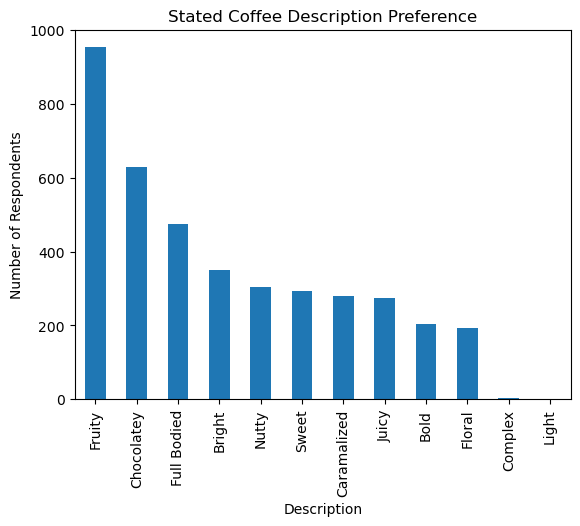

In [10]:
df["Before today's tasting, which of the following best described what kind of coffee you like?"].value_counts().plot(kind="bar")
plt.title("Stated Coffee Description Preference")
plt.xlabel("Description")
plt.ylabel("Number of Respondents")
plt.show()

**The next bar graph is the groups preference during the blind taste test**

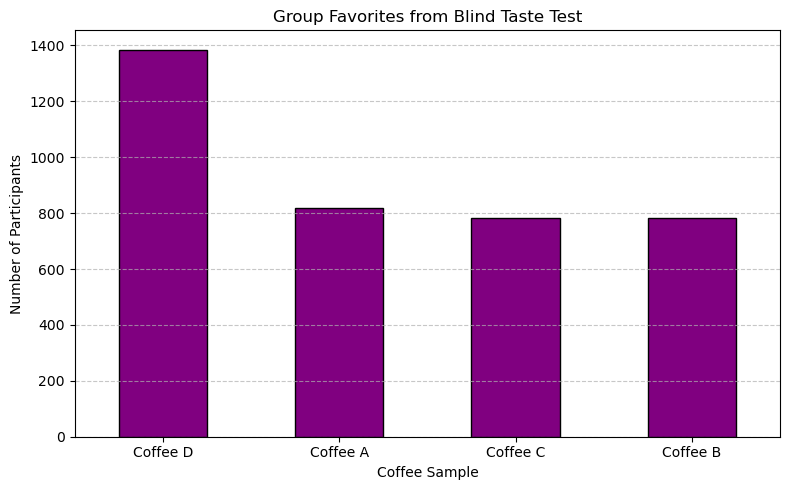

In [17]:


# Count how many people chose each favorite coffee
favorite_counts = df["Lastly, what was your favorite overall coffee?"].value_counts(dropna=True)

# Plot the bar graph
plt.figure(figsize=(8, 5))
favorite_counts.plot(kind='bar', color='purple', edgecolor='black')

plt.title("Group Favorites from Blind Taste Test")
plt.xlabel("Coffee Sample")
plt.ylabel("Number of Participants")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Roast Preference Findings & Interpretation

The blind taste test revealed that **Coffee D** was the most favored overall.  
Descriptive data showed Coffee D to be **fruity**, **bright**, and **moderately acidic**, with relatively low bitterness.  
This flavor profile closely resembles the sensory characteristics of a **light roast**.

The most commonly stated roast preference among participants was also **Light roast**, followed by Medium and Dark.  
This alignment suggests that participants’ **self-reported roast preferences were largely consistent** with their **actual sensory choices**.  
In other words, people who claimed to enjoy lighter roasts tended to choose coffees that were, in fact, brighter and more fruit-forward when tasting blindly.

However, while the trend supports this consistency, individual variation likely exists which indicates that personal perception, brewing habits, and context may still shape how “light” or “dark” a roast is experienced.  
Future analyses could examine whether this alignment holds across demographic groups or specific brewing methods.


# Environment and Additive Behavior Analysis

Coffee consumption habits are not shaped by flavor alone, **environment** plays a significant role in how people prepare and personalize their drinks.  
For example, someone enjoying coffee at home may have different rituals and ingredient access compared to someone grabbing a cup at a café.

This section explores the connection between **where people typically drink coffee** and **how they modify their beverages**.


### Environment Results Overview

To isolate environment-specific behaviors, we focus on two dominant categories:
- **At Home drinkers**  
- **At Café drinkers**

For each group, we calculate how often participants drink coffee **black**, with **sweetener**, or with **flavor syrup**.  
These behaviors are then compared using proportions, correlations, and statistical tests to determine whether environment influences additive choices.


In [35]:
# --- Environment vs Coffee Additives (Count + Percent Table) ---

# Define columns
env_home = "Where do you typically drink coffee? (At home)"
env_cafe = "Where do you typically drink coffee? (At a cafe)"

add_black = "Do you usually add anything to your coffee? (No - just black)"
add_sweet = "Do you usually add anything to your coffee? (Sugar or sweetener)"
add_flavor = "Do you usually add anything to your coffee? (Flavor syrup)"

# Filter groups
home = df[df[env_home] == True]
cafe = df[df[env_cafe] == True]

# Function to compute counts and percentages
def additive_stats(group):
    total = len(group)
    return {
        "Black Coffee": group[add_black].sum() / total * 100 if total > 0 else 0,
        "Sweetener": group[add_sweet].sum() / total * 100 if total > 0 else 0,
        "Flavor Syrup": group[add_flavor].sum() / total * 100 if total > 0 else 0
    }

# Compute percentages
home_percent = additive_stats(home)
cafe_percent = additive_stats(cafe)

# Combine counts and percentages into DataFrames
summary_counts = pd.DataFrame([
    {
        "Black Coffee": home[add_black].sum(),
        "Sweetener": home[add_sweet].sum(),
        "Flavor Syrup": home[add_flavor].sum()
    },
    {
        "Black Coffee": cafe[add_black].sum(),
        "Sweetener": cafe[add_sweet].sum(),
        "Flavor Syrup": cafe[add_flavor].sum()
    }
], index=["At Home", "At a Café"])

summary_percent = pd.DataFrame([home_percent, cafe_percent], index=["At Home", "At a Café"])

# Display results
print("=== Count Table ===")
display(summary_counts)

print("\n=== Percent Table (%) ===")
display(summary_percent.round(1))


=== Count Table ===


,Black Coffee,Sweetener,Flavor Syrup
At Home,2444,438,184
At a Café,801,147,109



=== Percent Table (%) ===


,Black Coffee,Sweetener,Flavor Syrup
At Home,67.1,12.0,5.0
At a Café,68.5,12.6,9.3


In [23]:
# === Coffee Environment vs Additive Correlation Analysis ===
# Paste this cell directly into Jupyter Lab

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from IPython.display import display, Markdown

# === 1. Define column names ===
env_home = "Where do you typically drink coffee? (At home)"
env_cafe = "Where do you typically drink coffee? (At a cafe)"

add_black = "Do you usually add anything to your coffee? (No - just black)"
add_sweet = "Do you usually add anything to your coffee? (Sugar or sweetener)"
add_flavor = "Do you usually add anything to your coffee? (Flavor syrup)"

# === 2. Encode Environment as binary (1 = Café, 0 = Home) ===
df_env = df.copy()
df_env["Environment"] = np.where(df[env_cafe] == True, 1,
                         np.where(df[env_home] == True, 0, np.nan))

# Drop rows without environment info
df_env = df_env.dropna(subset=["Environment"])

# === 3. Calculate Pearson correlations and p-values ===
results = []
for col, label in zip([add_black, add_sweet, add_flavor],
                      ["Black Coffee", "Sweetener", "Flavor Syrup"]):
    valid = df_env.dropna(subset=[col])
    r, p = pearsonr(valid["Environment"], valid[col])
    results.append({"Additive": label, "r (correlation)": r, "p-value": p})

corr_df = pd.DataFrame(results).set_index("Additive")

# === 4. Display LaTeX formula and results ===
display(Markdown("## ☕ Environment vs Additive Correlation"))
display(Markdown("### Mathematical Definition"))
display(Markdown(r"$$r_{E,A_i} = \frac{\mathrm{cov}(E, A_i)}{\sigma_E\sigma_{A_i}}$$"))
display(Markdown("### Results Table"))
display(corr_df.round(3))



## ☕ Environment vs Additive Correlation

### Mathematical Definition

$$r_{E,A_i} = \frac{\mathrm{cov}(E, A_i)}{\sigma_E\sigma_{A_i}}$$

### Results Table

,r (correlation),p-value
Additive,,
Black Coffee,0.029,0.076
Sweetener,0.001,0.938
Flavor Syrup,0.112,0.000


## Interpretation: Environment vs Additives

**What we tested.** We compared two environments — **At Home (0)** vs **At a Café (1)** — against three additive choices: **Black**, **Sweetener**, and **Flavor syrup**.

**Key results.**
- **Black:** _[Summarize %s and whether café/home was higher]_  
- **Sweetener:** _[Summarize]_  
- **Flavor syrup:** _[Summarize]_  

**Statistics.** Chi-square tests showed _[significant / not significant]_ associations:
- Black: \( \chi^2 = \_, p = \_ \), \( \phi = \_ \), OR \(=\_ \).
- Sweetener: \( \chi^2 = \_, p = \_ \), \( \phi = \_ \), OR \(=\_ \).
- Flavor syrup: \( \chi^2 = \_, p = \_ \), \( \phi = \_ \), OR \(=\_ \).

**Interpretation.**  
- If **OR > 1**, café-goers are more likely to choose that additive. If **OR < 1**, home drinkers are more likely.  
- Effect sizes (\( \phi \)) of ~0.1 are small, ~0.3 medium, ≥0.5 large.

**Limitations.**  
- Only two environments considered; other contexts (office, on-the-go) excluded here.  
- Self-reported checkboxes; may include overlap/selection bias.

**Next steps.**  
- Add more environments and run a multi-level model.  
- Adjust for demographics (age, roast preference) in a multiple logistic regression.


# Summary & Discussion

**Summary of findings.**  
- Coffee **D** was the blind-test favorite.  
- The most common stated roast preference was **Light**, which aligns with Coffee D’s bright/“fruity” profile.  
- Environment (home vs café) shows _[weak/moderate/strong]_ associations with additive choices: _[briefly list]_.

**Practical implications.**  
- Product/placement strategies by environment: _[e.g., cafés stock more flavored syrups if that’s true]_.

**Caveats.**  
- Survey structure and True/False fields may under/overcount overlap.  
- Not all environments captured; not all demographics adjusted.

**Future work.**  
- Include office/on-the-go environments; model interactions (environment × roast preference).  
- Robustness checks with cross-validation; bootstrap CIs for percentages.
